In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df=pd.read_csv('/content/datalab_export_2025-07-29 16_38_01.csv')
df.head()

,index,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,1,debt_consolidation,0.1189,829.10,11.3504,19.48,737,5639.9583,28854,52.1,0,0,0,0
1,2,1,credit_card,0.1071,228.22,11.0821,14.29,707,2760.0000,33623,76.7,0,0,0,0
2,3,1,debt_consolidation,0.1357,366.86,10.3735,11.63,682,4710.0000,3511,25.6,1,0,0,0
3,4,1,debt_consolidation,0.1008,162.34,11.3504,8.10,712,2699.9583,33667,73.2,1,0,0,0
4,5,1,credit_card,0.1426,102.92,11.2997,14.97,667,4066.0000,4740,39.5,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              100 non-null    int64  
 1   credit_policy      100 non-null    int64  
 2   purpose            100 non-null    object 
 3   int_rate           100 non-null    float64
 4   installment        100 non-null    float64
 5   log_annual_inc     100 non-null    float64
 6   dti                100 non-null    float64
 7   fico               100 non-null    int64  
 8   days_with_cr_line  100 non-null    float64
 9   revol_bal          100 non-null    int64  
 10  revol_util         100 non-null    float64
 11  inq_last_6mths     100 non-null    int64  
 12  delinq_2yrs        100 non-null    int64  
 13  pub_rec            100 non-null    int64  
 14  not_fully_paid     100 non-null    int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 11.8+ KB


<Axes: ylabel='not_fully_paid'>

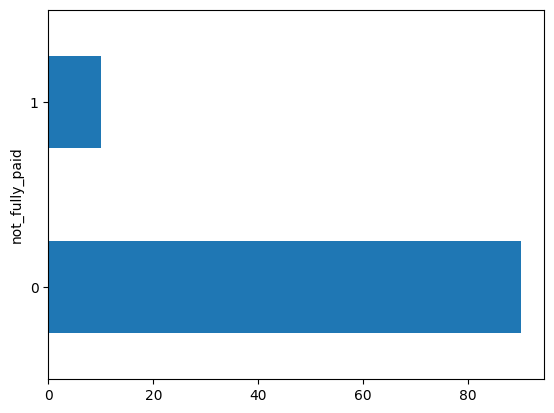

In [ ]:
df['not_fully_paid'].value_counts().plot(kind='barh')

In [7]:
# #undersampling
# loan_data_class_1 = df[df['not_fully_paid'] == 1]
# number_class_1 = len(loan_data_class_1)
# loan_data_class_0 = df[df['not_fully_paid'] == 0].sample(number_class_1)

# final_loan_data = pd.concat([loan_data_class_1,
#                                 loan_data_class_0])

# print(final_loan_data.shape)


df.drop('purpose', axis=1, inplace=True)
df.drop('index', axis=1, inplace=True)
df.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,0.1189,829.10,11.3504,19.48,737,5639.9583,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.0821,14.29,707,2760.0000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.3735,11.63,682,4710.0000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.3504,8.10,712,2699.9583,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.2997,14.97,667,4066.0000,4740,39.5,0,1,0,0


In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


scaler = MinMaxScaler(feature_range=(0, 1))
X = df.drop('not_fully_paid', axis=1)
y = df['not_fully_paid']
normalized_X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test= train_test_split(normalized_X, y, test_size=0.3,random_state=42)
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8666666666666667
